In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean08=pd.read_csv("clean_08.csv")
clean18=pd.read_csv("clean_18.csv")
clean08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,VOLVO XC 90,3.2,6,Auto-S6,2WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
983,VOLVO XC 90,3.2,6,Auto-S6,4WD,Gasoline,SUV,7.0,14.0,20.0,16.0,4,no
984,VOLVO XC 90,4.4,8,Auto-S6,4WD,Gasoline,SUV,7.0,13.0,19.0,15.0,3,no
985,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6.0,13.0,19.0,15.0,7,no


In [3]:
clean08.rename(columns={"cmb_mpg":"cmb_mpg08"},inplace=True)

In [4]:
clean18.rename(columns={"cmb_mpg":"cmb_mpg18"},inplace=True)

In [5]:
clean18['veh_class'].value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

1. Find out the alternative sources of fuel available in 2008 & 2018 respectively and by how much?

In [6]:
#Alternative source of fuel (2008)
Alternative_source_08=clean08[clean08["fuel"]!="Gasoline"]
Alternative_source_08=pd.DataFrame(Alternative_source_08['fuel'].value_counts())
Alternative_source_08

,fuel
CNG,1
ethanol,1
gas,1


In [7]:
#Alternative source of fuel (2018)
Alternative_source_18=clean18[clean18["fuel"]!="Gasoline"]
Alternative_source_18=pd.DataFrame(Alternative_source_18['fuel'].value_counts())
Alternative_source_18

,fuel
Ethanol,26
Gas,26
Diesel,19
Electricity,12



# Q2. Is there any improvement in ‘fuel economy’ with respect to vehicle class from 2008 to 2018, perform the necessary steps to examine?

In [8]:
fuel_economy_08=clean08.groupby('veh_class')
fuel_economy_18=clean18.groupby('veh_class')

In [9]:

fuel_economy_08=fuel_economy_08['cmb_mpg08'].mean()
#fuel_economy_08.rename(columns={'cmb_mpg':'cmb_mpg_08'})


In [10]:
fuel_economy_18=fuel_economy_18['cmb_mpg18'].mean()


In [11]:
fuel_economy_combined=pd.concat([fuel_economy_08,fuel_economy_18],axis=1)

In [12]:
fuel_economy_combined

,cmb_mpg08,cmb_mpg18
veh_class,,
SUV,18.471429,NaN
large car,18.509091,23.409091
midsize car,21.601449,27.884058
minivan,19.117647,20.800000
pickup,16.277108,18.589744
small car,21.105105,25.421053
station wagon,22.366667,27.529412
van,14.952381,NaN
small SUV,NaN,24.074074


In [13]:
fuel_economy_combined

,cmb_mpg08,cmb_mpg18
veh_class,,
SUV,18.471429,NaN
large car,18.509091,23.409091
midsize car,21.601449,27.884058
minivan,19.117647,20.800000
pickup,16.277108,18.589744
small car,21.105105,25.421053
station wagon,22.366667,27.529412
van,14.952381,NaN
small SUV,NaN,24.074074


In [14]:
fuel_economy_combined.fillna(0,inplace=True)

In [15]:
fuel_economy_combined

,cmb_mpg08,cmb_mpg18
veh_class,,
SUV,18.471429,0.000000
large car,18.509091,23.409091
midsize car,21.601449,27.884058
minivan,19.117647,20.800000
pickup,16.277108,18.589744
small car,21.105105,25.421053
station wagon,22.366667,27.529412
van,14.952381,0.000000
small SUV,0.000000,24.074074


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


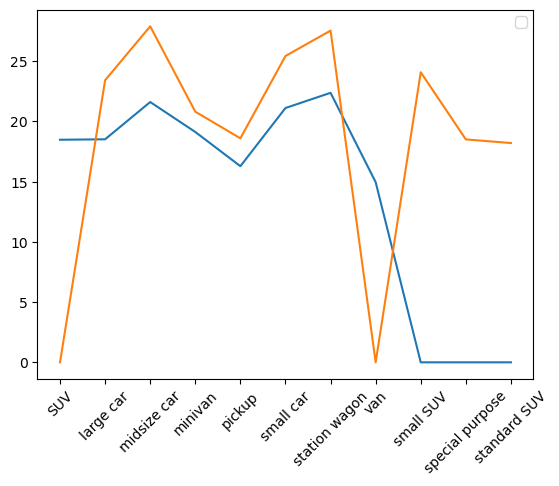

In [16]:
plt.plot(fuel_economy_combined)
plt.xticks(rotation=45)
plt.legend();
plt.show()

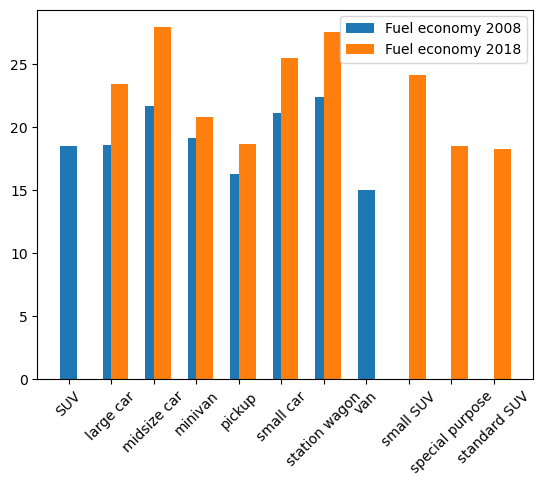

In [17]:
plt.bar(fuel_economy_combined.index,fuel_economy_combined['cmb_mpg08'],width=0.4,label='Fuel economy 2008')
plt.bar(fuel_economy_combined.index,fuel_economy_combined['cmb_mpg18'],width=0.4,align='edge',label='Fuel economy 2018')
plt.xticks(rotation=45)
plt.legend();
plt.show()



# Q3.  Is there any change in characteristics of SmartWay Vehicles ?

In [18]:
list(clean08['smartway'].unique())

['no', 'yes']

In [19]:
list(clean18['smartway'].unique())

['No', 'Yes', 'Elite']

Yes, there is change in characteristics of smartway vehicle

# Q4. Which all features are associated with better fuel economy?

In [21]:
influential_featurea=['displ','cyl','cmb_mpg08']
clean08[influential_featurea].corr()

,displ,cyl,cmb_mpg08
displ,1.000000,0.899304,-0.818799
cyl,0.899304,1.000000,-0.770538
cmb_mpg08,-0.818799,-0.770538,1.000000


<Axes: >

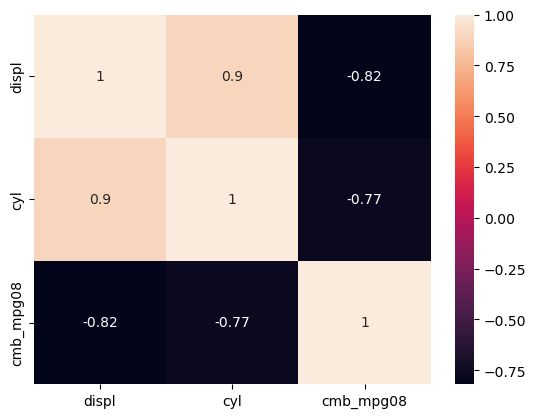

In [22]:
sns.heatmap(clean08[influential_featurea].corr(),annot=True)

# Q5. How much improvement is there in miles/gallon or mpg? Also, which vehicle has improved the most?

In [26]:

fuel_economy_combined.drop(fuel_economy_combined[(fuel_economy_combined.cmb_mpg18 ==0) | (fuel_economy_combined.cmb_mpg08 ==0)].index,inplace=True)

In [27]:
fuel_economy_combined["Difference in milage"]=fuel_economy_combined['cmb_mpg18']-fuel_economy_combined['cmb_mpg08']

In [28]:
fuel_economy_combined["Difference in milage"]

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: Difference in milage, dtype: float64

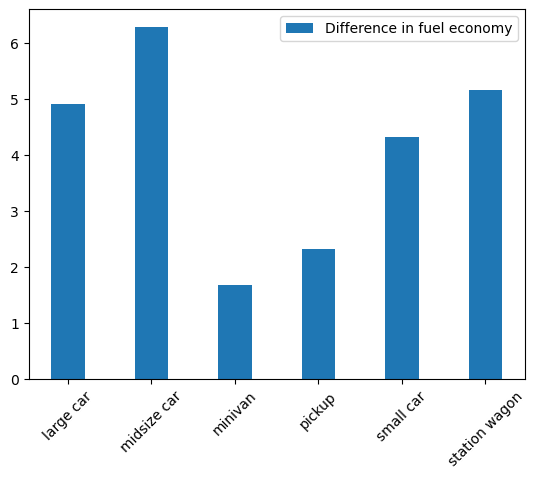

In [29]:
plt.bar(fuel_economy_combined.index,fuel_economy_combined['Difference in milage'],width=0.4,label='Difference in fuel economy')
plt.xticks(rotation=45)
plt.legend();
plt.show()


In [34]:
fuel_economy_combined[fuel_economy_combined['Difference in milage']==fuel_economy_combined["Difference in milage"].max()]

,cmb_mpg08,cmb_mpg18,Difference in milage
veh_class,,,
midsize car,21.601449,27.884058,6.282609
